In [1]:
!pip install yfinance


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error


In [3]:
data = yf.download('KO', start='2015-01-01', end='2024-01-01')
data.reset_index(inplace=True)
data.head()


/tmp/ipython-input-4283356239.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('KO', start='2015-01-01', end='2024-01-01')
[*********************100%***********************]  1 of 1 completed


Price,Date,Close,High,Low,Open,Volume
Ticker,,KO,KO,KO,KO,KO
0,2015-01-02,29.783403,29.967166,29.543101,29.868215,9921100
1,2015-01-05,29.783403,30.370026,29.740999,30.172128,26292600
2,2015-01-06,30.009579,30.348829,29.854090,29.974241,16897500
3,2015-01-07,30.384165,30.468977,30.094388,30.249876,13412300
4,2015-01-08,30.751688,30.794095,30.461911,30.518454,21743600


In [4]:
data['MA_20'] = data['Close'].rolling(20).mean()
data['MA_50'] = data['Close'].rolling(50).mean()
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility'] = data['Daily_Return'].rolling(20).std()

data.dropna(inplace=True)


In [5]:
data = yf.download('KO', start='2015-01-01', end='2024-01-01', auto_adjust=False)


[*********************100%***********************]  1 of 1 completed


In [7]:
data.reset_index(inplace=True)


In [10]:
data['MA_20'] = data['Close'].rolling(20).mean()
data['MA_50'] = data['Close'].rolling(50).mean()
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility'] = data['Daily_Return'].rolling(20).std()

data.dropna(inplace=True)


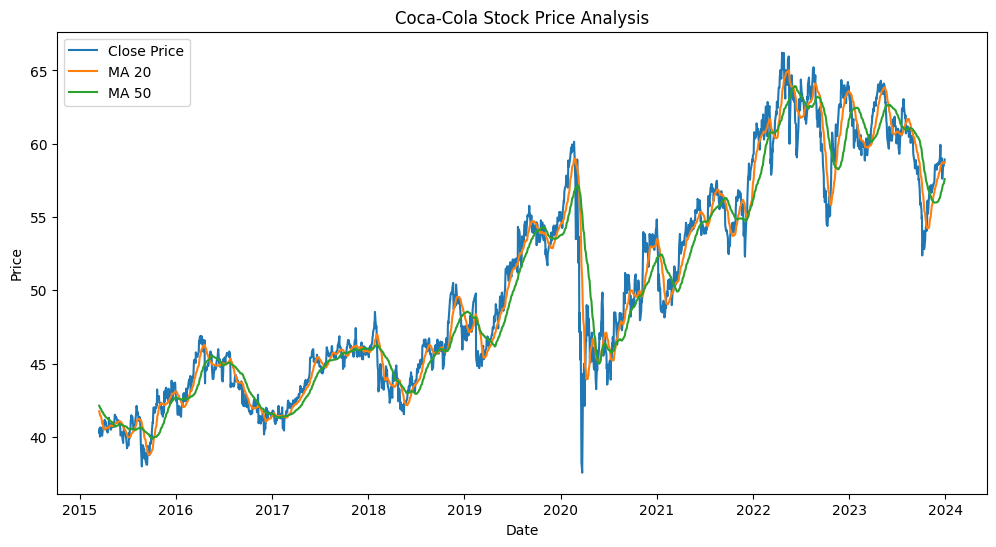

In [11]:
plt.figure(figsize=(12,6))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['MA_20'], label='MA 20')
plt.plot(data['Date'], data['MA_50'], label='MA 50')
plt.legend()
plt.title("Coca-Cola Stock Price Analysis")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


In [12]:
X = data[['Open', 'High', 'Low', 'Volume', 'MA_20', 'MA_50']]
y = data['Close']


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)


In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(random_state=42)

In [15]:
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)


Mean Absolute Error: 0.6442690194433478


In [17]:
data[data['Date'] == '2015-01-02']


Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_20,MA_50,Daily_Return,Volatility
Ticker,,KO,KO,KO,KO,KO,KO,,,,


In [16]:
latest_data = X.tail(1)
future_price = model.predict(latest_data)

print("Predicted Closing Price:", future_price[0])


Predicted Closing Price: 58.933500061035154


In [18]:
data_2015 = data[data['Date'].dt.year == 2015]
data_2015.head()


Price,Date,Adj Close,Close,High,Low,Open,Volume,MA_20,MA_50,Daily_Return,Volatility
Ticker,,KO,KO,KO,KO,KO,KO,,,,
49,2015-03-16,28.712152,40.290001,40.349998,39.990002,40.000000,15238800,41.7465,42.1286,0.009521,0.010667
50,2015-03-17,28.868948,40.509998,40.730000,40.320000,40.669998,21661800,41.6815,42.0960,0.005460,0.010779
51,2015-03-18,28.933077,40.599998,40.790001,39.799999,40.480000,26247500,41.6250,42.0652,0.002222,0.010811
52,2015-03-19,28.519749,40.020000,40.520000,39.959999,40.480000,16057600,41.5205,42.0164,-0.014286,0.010889
53,2015-03-20,28.968716,40.650002,40.660000,40.009998,40.070000,31608500,41.4545,41.9696,0.015742,0.011622
